In [2]:
#These scripts plot the data from CalculatePunctaness_final.ipynb
#This Jupyter notebook contains functions for parsing data, making a box plot and visualizing 
#Specific steps of the CalculatePunctaness algorithm. 

#Occasionally you will need to update the PATH to the appropriate input data
#input data used in this notebook are area.txt, punctaness_disk8.txt, and .jpg
#files found in nd2asjpg
#These data can be found in the LAMMDAS_Image_Analysis_Final_Submission directory

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index, match_template
from skimage.draw import circle
import skimage.io as io
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat, skeletonize, convex_hull_image, disk
from scipy.ndimage.morphology import distance_transform_bf
from skimage.exposure import rescale_intensity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index, match_template
from skimage.draw import circle
import skimage.io as io
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat, skeletonize, convex_hull_image, disk
from scipy.ndimage.morphology import distance_transform_bf, distance_transform_edt
from skimage.exposure import rescale_intensity
from skimage.filters import laplace, threshold_adaptive, threshold_otsu
from sklearn.cluster import KMeans
from skimage.color import label2rgb
import pylab as pyl
import seaborn as sns
import scipy as spy

from numpy import array

import pandas as pd
%matplotlib inline

In [5]:
#puncta 8 refers to the outputfile from Calculate puntaness using a radii of 8
fname = '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/\
20181002_160910_824\
/LAMMDAS_Image_Analysis_Final_Submission/punctaness_disk8.txt' #Update PATH
puncta8 = open(fname,'r')

In [6]:
#area8 refers to the total pixel count from calculate punctaness using a radii of 8
aname = '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy\
/20181002_160910_824/\
LAMMDAS_Image_Analysis_Final_Submission/area.txt' #Update PATH
area8 = open(aname,'r')


In [7]:
#Parses data from puncta8 into python list
def parse_lines_by_five_get_intensities(puncta8):
    names = []
    intensities = []
    for line in puncta8:
        print(line)
        line.strip()
        current_line = line.split(',')
        names.append(current_line[0])
        intensities.append(current_line[1])

    count = 0
    for i in intensities:
        intensities[count] = i.strip()
        count+=1
        
    count = 0
    px = []
    vals = []
    for i in intensities:
        vals.append(i)
        count+=1  
        if count == 5:
            count = 0
            px.append(vals)
            vals = []

    n = 0
    px2 = []
    while n < len(px)/2:
        px2.append(px[n])
        px2.append(px[n+5])
        n+=1
    return px2

#This function is called on px2 and areas
#areas are parsed from areas.txt into a python list using parse_lines_by_five_get_intensities(area8)
def element_wise_normalize(x1,x2):
    if len(x1)!=len(x2):
        print('List lengths unequal')
        return
    count = 0
    normalized = []
    while count < len(x1):
        subcounter = 0
        norm_list = []
        for item in x1[count]:
            divided = int(item)
            divisor = int(x2[count][subcounter])
            norm = divided/divisor
            subcounter+=1
            norm_list.append(norm)
        normalized.append(norm_list)
        count+=1
    return normalized

#This functions performs a t-test assuming unequal varience for each condition
def ttest_my_data(normalized):
    n = 0
    t=[]
    p=[]
    while n < len(normalized)-1:
        drug = normalized[n]
        apo = normalized[n+1]
        tstat, pval = spy.stats.ttest_ind(drug,apo,equal_var=False)
        t.append(tstat)
        p.append(pval)
        n+=2
    return t,p

def turn_this_nested_list_of_strings_into_ints(nested_string_list):
    px2_int = []
    for i in nested_string_list:
        temp = []
        for n in i:
            a = int(n)
            temp.append(a)
        px2_int.append(temp)
    return px2_int 

#This funciton makes a box plot, uncomment the final line to save figure
def make_a_box_plot(px2):
    plt.figure(figsize=(24,16))
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 24}

    plt.rc('font', **font)
    sns.boxplot(palette=["sandybrown","lightsteelblue"],
                data=px2[0:8])
    sns.despine(offset=10, trim=True) #["w","k"]
    plt.xticks([0,1,2,3,4,5,6,7],['WTα+','WTα-','A53T+','A53T-','A30P+', 'A30P-',\
                  'E46K+','E46K-'])
    plt.ylabel('Total Puncta Intensity')
    plt.legend()
    #plt.savefig('/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/OutputData/fig_raw_puncta_intensity.png')
    

In [8]:
#px2 is a list of lists 10x5. 1 for each condition x 5 stacks per conditions.
#The int numbers are the total pixel intensities for each condition
px2 = parse_lines_by_five_get_intensities(puncta8)

#similiar to px2, areas is  10x5 list. 1 for each condition x 5 stacks per condition.
#Unlike px2, areas contain only the pixel count for each condition, not the total intensity
areas = parse_lines_by_five_get_intensities(area8)

#normalized is simply the element wise division of px2 by area
#This helps account for variations in total cell count per condition
normalized = element_wise_normalize(px2,areas)

C4_LAMMDAS_dopamine_WTXY1C1.jp2, 3432647

C4_LAMMDAS_dopamine_WTXY2C1.jp2, 2709101

C4_LAMMDAS_dopamine_WTXY3C1.jp2, 2717008

C4_LAMMDAS_dopamine_WTXY4C1.jp2, 4944677

C4_LAMMDAS_dopamine_WTXY5C1.jp2, 4838435

C5_LAMMDAS_dopamine_A53TXY1C1.jp2, 3530821

C5_LAMMDAS_dopamine_A53TXY2C1.jp2, 2683541

C5_LAMMDAS_dopamine_A53TXY3C1.jp2, 3461528

C5_LAMMDAS_dopamine_A53TXY4C1.jp2, 4196934

C5_LAMMDAS_dopamine_A53TXY5C1.jp2, 4085137

C6_LAMMDAS_dopamine_A30PXY1C1.jp2, 1396062

C6_LAMMDAS_dopamine_A30PXY2C1.jp2, 1329362

C6_LAMMDAS_dopamine_A30PXY3C1.jp2, 1698134

C6_LAMMDAS_dopamine_A30PXY4C1.jp2, 1617850

C6_LAMMDAS_dopamine_A30PXY5C1.jp2, 2102985

C7_LAMMDAS_dopamine_E46KXY1C1.jp2, 2321749

C7_LAMMDAS_dopamine_E46KXY2C1.jp2, 2894494

C7_LAMMDAS_dopamine_E46KXY3C1.jp2, 3069928

C7_LAMMDAS_dopamine_E46KXY4C1.jp2, 2989948

C7_LAMMDAS_dopamine_E46KXY5C1.jp2, 3532778

C8_LAMMDAS_dopamine_gfpXY1C1.jp2, 29995820

C8_LAMMDAS_dopamine_gfpXY2C1.jp2, 30741865

C8_LAMMDAS_dopamine_gfpXY3C1.jp2, 33455864

No handles with labels found to put in legend.
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


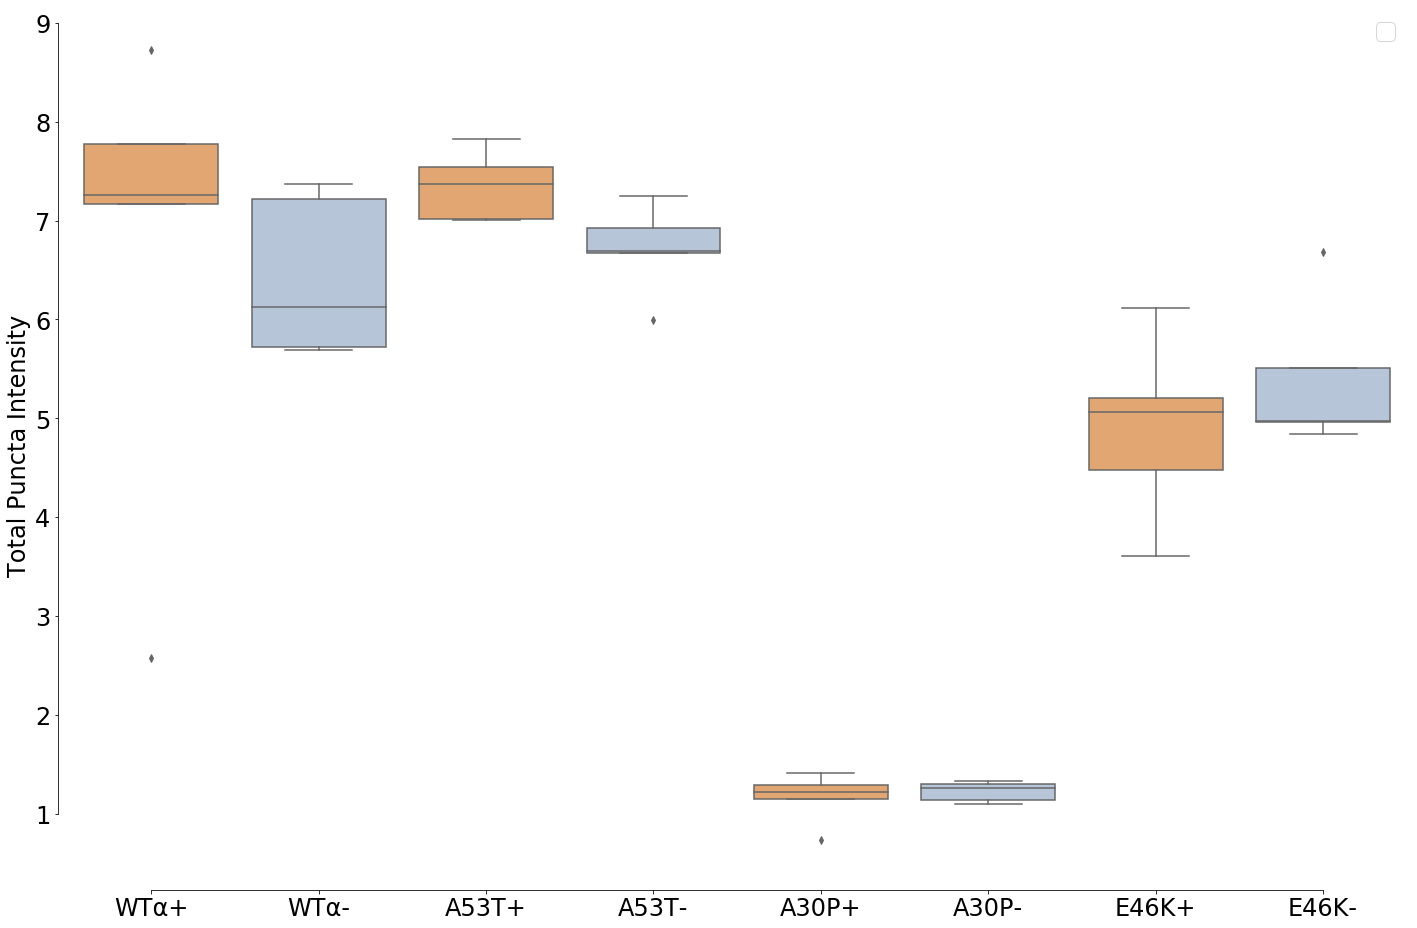

In [9]:
make_a_box_plot(normalized)

In [10]:
#Does a bunch of ttests without duplicate tests
#my data is a 10x5 python list (not a numpy list)
def do_a_bunch_of_ttests_on_my_data(mydata):
    i = 0
    ttest = []
    coords=[]
    for i in range(len(mydata)):
        for j in range(len(mydata[i:-1])):
            tstat, pval = spy.stats.ttest_ind(mydata[i],mydata[j+i+1],equal_var=False)
            ttest.append(pval)
            coords.append((i,i+j+1))
    return coords,ttest

In [11]:
#This block prints the significant pvalues for each ttest. 
#For the coordinate key see the list below
coords, ttest = do_a_bunch_of_ttests_on_my_data(normalized)
def print_pvals_less_than_005():
    p_vals_less_than_005 = []
    coors_less_than_005 = []
    for i in range(len(ttest)):
        if ttest[i]<0.1:
            p_vals_less_than_005.append(ttest[i])
            coors_less_than_005.append(coords[i])
    print("n, coordinate, p-value")
    for i in range(len(p_vals_less_than_005)):
        c = coors_less_than_005[i]
        p = p_vals_less_than_005[i]
        n = i
        if ((c[0] != 4) and (c[1]!=4)) and ((c[0]!=5) and (c[1]!=5)):
            print(n,c,p)

print_pvals_less_than_005()
#n is the test number
#coordinate is a tuple
#p-value

n, coordinate, p-value
2 (1, 2) 0.06299818732008192
5 (1, 6) 0.024425552644029975
6 (1, 7) 0.07254827499976065
7 (2, 3) 0.03845609936206249
10 (2, 6) 0.0024332936975813876
11 (2, 7) 0.0024350261478697974
14 (3, 6) 0.008278533986450278
15 (3, 7) 0.014575375775128022
24 (6, 8) 0.0778299583501211
25 (6, 9) 0.0801623602751195
26 (7, 8) 0.09024068950419259
27 (7, 9) 0.09155418724640443


In [12]:
# Function prints the pvalue of each t-test as a coordinate pair, p value
# Each number in coordinate pair corresponds to an experimantal condition
# Coordinate Key
    #0 WT + Dopamine
    #1 WT No drug
    #2 A53T Dopamine
    #3 A53T no Druge
    #4 A30P Dopamine
    #5 A30P no drug
    #6 E46K Dopamine
    #7 E46K No drug
    #8 GFP Dopamine
    #9 GFP No Drug
#The print statement shows all possible ttests without duplicates
def print_coords_and_pvals():
    print("n, coordinate, p-value")
    for i in range(len(coords)):
        print(coords[i],ttest[i])
    
print_coords_and_pvals()

n, coordinate, p-value
(0, 1) 0.8179508629454393
(0, 2) 0.5768932518428382
(0, 3) 0.996634135952136
(0, 4) 0.006280143228583477
(0, 5) 0.00679377057257633
(0, 6) 0.1729317051452527
(0, 7) 0.29770066899057784
(0, 8) 0.13530177556721346
(0, 9) 0.13123401254034506
(1, 2) 0.06299818732008192
(1, 3) 0.52890423471126
(1, 4) 4.8317851382522945e-05
(1, 5) 0.00011868869367154463
(1, 6) 0.024425552644029975
(1, 7) 0.07254827499976065
(1, 8) 0.12306777430495042
(1, 9) 0.12092881023121832
(2, 3) 0.03845609936206249
(2, 4) 3.8679060320652115e-09
(2, 5) 5.651277071695914e-07
(2, 6) 0.0024332936975813876
(2, 7) 0.0024350261478697974
(2, 8) 0.16347203677119357
(2, 9) 0.1559624215779446
(3, 4) 2.075681958099543e-07
(3, 5) 5.368634122168822e-06
(3, 6) 0.008278533986450278
(3, 7) 0.014575375775128022
(3, 8) 0.13397841652826953
(3, 9) 0.1305023088725968
(4, 5) 0.6211576503055991
(4, 6) 0.0005019907703541276
(4, 7) 8.89459628101243e-05
(4, 8) 0.02883052623028462
(4, 9) 0.03248765257048638
(5, 6) 0.00083496

In [13]:
#All following blocks help visualize algorithm output

fbaselist = ['C4_LAMMDAS_dopamine_WTXY','C5_LAMMDAS_dopamine_A53TXY','C6_LAMMDAS_dopamine_A30PXY','C7_LAMMDAS_dopamine_E46KXY',\
            'C8_LAMMDAS_dopamine_gfpXY','E4_LAMMDAS_apo_WTXY','E5_LAMMDAS_apo_A53TXY','E6_LAMMDAS_apo_A30PXY','E7_LAMMDAS_apo_E46KXY',\
            'E8_LAMMDAS_apo_gfpXY']
def make_file_list():
    file_list = []
    fpath = '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/nd2as8bit/'
    for fbase in fbaselist:
        for stack in range(1,6):
            fname = fbase+str(stack)+'C1.jp2'
            fullpath = fpath+fname
            file_list.append(fullpath)
    return file_list

testset = []
for fbase in fbaselist:
    fname = fbase+str(2)+'C1.jp2'
    fpath = '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/'#Update PATH
    fullpath = fpath + fname
    testset.append(fullpath)

testset

['/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/C4_LAMMDAS_dopamine_WTXY2C1.jp2',
 '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/C5_LAMMDAS_dopamine_A53TXY2C1.jp2',
 '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/C6_LAMMDAS_dopamine_A30PXY2C1.jp2',
 '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/C7_LAMMDAS_dopamine_E46KXY2C1.jp2',
 '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/C8_LAMMDAS_dopamine_gfpXY2C1.jp2',
 '/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/LAMMDAS_Image_Analysis_Final_Submission/nd2as8bit/E4_LAMMDAS_ap

In [14]:
#Takes about 10s to run
WTD = io.imread(testset[0])

A53TD = io.imread(testset[1])
A30PD = io.imread(testset[2])
E46KD = io.imread(testset[3])
GFPD = io.imread(testset[4])
WTa = io.imread(testset[5])
A53Ta = io.imread(testset[6])
A30Pa = io.imread(testset[7])
E46Ka = io.imread(testset[8])
gfpa = io.imread(testset[9])

imlist = [WTD,A53TD,A30PD,E46KD,GFPD,WTa,A53Ta,A30Pa,E46Ka,gfpa]

In [15]:
#Makes a bunch of small images to work with
row, col = A53TD.shape
smallIM = []
n,m = 287,12
l,i,j = 49,51,100
for r in imlist:
    a = r[int(l*row/j)+n:int(i*row/j)+n,int(l*col/j)+m:int(i*col/j)+m]
    smallIM.append(a)

#testset = [WTD[int(3*row/8)+1000:int(5*row/8)+1000,int(3*col/8)+1000:int(5*col/8)+1000],smallIM[2]]

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


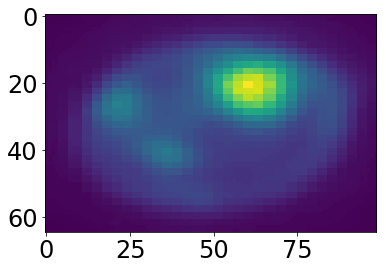

In [16]:
#wt = WTD[int(3*row/8)+500:int(5*row/8)+500,int(3*col/8)+500:int(5*col/8)+500]
#A30P = smallIM[2]
wt = smallIM[0]
gee = wt.copy()
gee[41,37] = 0
plt.imshow(wt)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


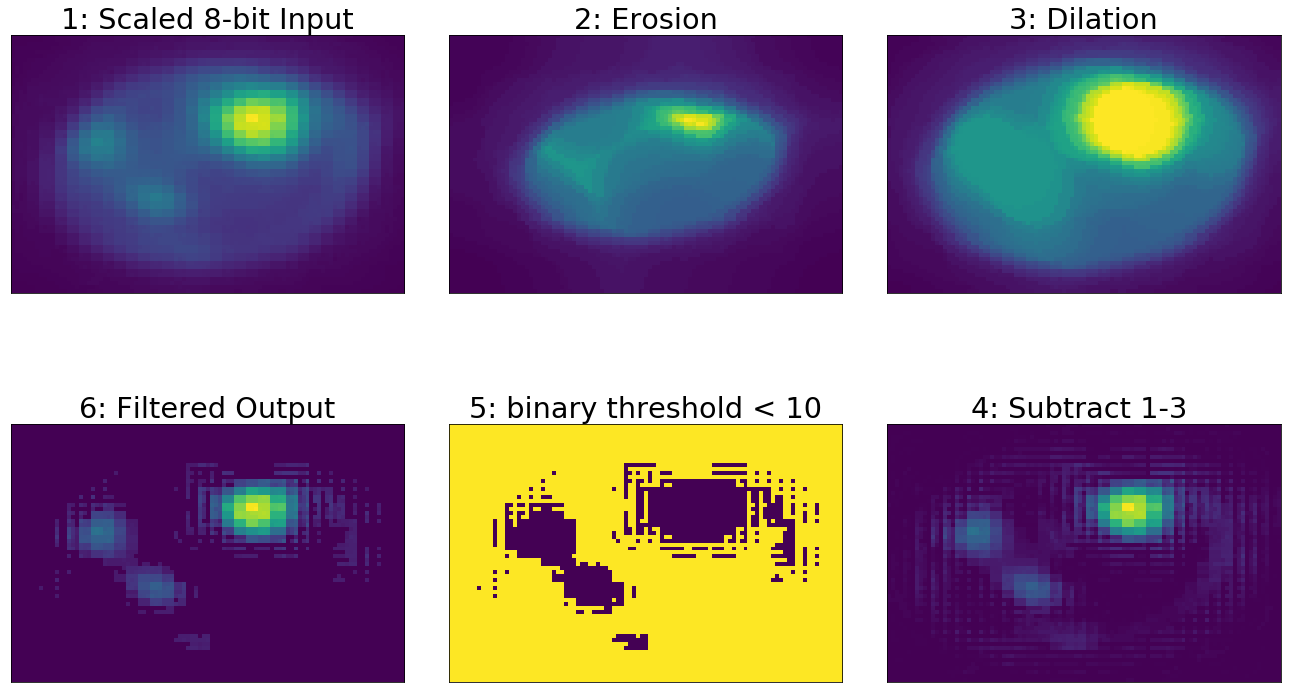

In [17]:
#Run this entire block to visualize algorithm
#The ouput of puncta_tester_pipeline is the input to plot_process
def puncta_tester_pipeline(wt,A30P):
    #Step1 Rescale
    wt = rescale_intensity(wt,in_range='image')
    A30P = rescale_intensity(A30P,in_range='image')

    #WTD_FULL = rescale_intensity(WTD,in_range='image')
    #A30P_FULL = rescale_intensity(A30PD,in_range='image')

    #Step2 Make Disk Sizing Element
    cell = disk(8)
    #Step 3 Erode
    erodewt = erosion(wt,cell)
    erodeA30P = erosion(A30P,cell)
    # Step 4 calculate opening
    openwt = opening(wt,cell)
    openA30P = opening(A30P,cell)
    # Step5 Calculate WTH
    wthwt = wt-openwt
    wthA30P=A30P-openA30P

    #WTD_WTH = WTD_FULL - opening(WTD_FULL,cell)

    #A30P_WTH = A30P_FULL - opening(A30P_FULL,cell)

    #mask3 = WTD_WTH<thresh
   # mask4 = A30P_WTH<thresh

    # Step 6 Threshold by 10
    thresh = 10
    mask1 = wthwt<thresh
    mask2 = wthA30P<thresh

    # Make Copies to mask
    wth1 = wthwt.copy()
    wth2 = wthA30P.copy()

   # wth3 = WTD_WTH.copy()
   # wth4 = A30P_WTH.copy()

    #Show Show Cleaned images
    wth1[mask1]=0
    wth2[mask2]=0

  #  wth3[mask3]=0
  #  wth4[mask4]=0
    return wt, erodewt, openwt, wthwt, mask1, wth1

#Plots images for each step of the processing algorithm for better visualization
def plot_process(wt,erodewt,openwt,wthwt,mask1,wth1):
    f, ax = plt.subplots(2,3,figsize=(18,12))
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 24}
    plt.rc('font', **font)
    ax[0,0].imshow(wt)
    ax[0,0].set_title('1: Scaled 8-bit Input')
    ax[0,0].set_yticks([])
    ax[0,0].set_xticks([])
    ax[0,1].imshow(erodewt)
    ax[0,1].set_title('2: Erosion')
    ax[0,1].set_yticks([])
    ax[0,1].set_xticks([])
    ax[0,2].imshow(openwt)
    ax[0,2].set_title('3: Dilation')
    ax[0,2].set_yticks([])
    ax[0,2].set_xticks([])
    ax[1,0].imshow(wth1)
    ax[1,0].set_title('6: Filtered Output')
    ax[1,0].set_yticks([])
    ax[1,0].set_xticks([])
    ax[1,1].imshow(mask1)
    ax[1,1].set_title('5: binary threshold < 10')
    ax[1,1].set_yticks([])
    ax[1,1].set_xticks([])
    ax[1,2].imshow(wthwt)
    ax[1,2].set_title('4: Subtract 1-3 ')
    ax[1,2].set_yticks([])
    ax[1,2].set_xticks([])
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=0.2)
    #plt.savefig('/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/OutputData/fig_morpholgy_filter_process_diagram_mini.png')


#test_and_plot calls the previous two function
def test_and_plot(wt):
    a,b,c,d,e,f = puncta_tester_pipeline(wt,wt)
    plot_process(a,b,c,d,e,f)

#This line calls test_amd_plot
test_and_plot(wt)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


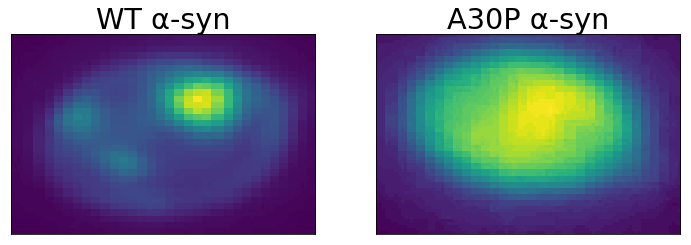

In [18]:

def compare_wt_to_A30P():
    n,m = 450,190
    z = 100

    l,i,j = z/2-1,z/2+1,z

    fig, ax = plt.subplots(1,2,figsize=(12,12))
    ax[0].set_title('WT α-syn')
    ax[0].imshow(smallIM[0])
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    ax[1].set_title('A30P α-syn')
    ax[1].imshow(imlist[2][int(l*row/j)+n:int(i*row/j)+n,int(l*col/j)+m:int(i*col/j)+m])
    ax[1].set_yticks([])
    ax[1].set_xticks([])
    #plt.savefig('/Users/ajipalar/Documents/UCSF/Classes/PUBS/LAMMDAS/Microscopy/20181002_160910_824/OutputData/WT_A30P_Comparison.png')

compare_wt_to_A30P()




/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


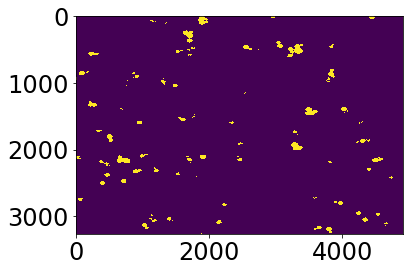

In [19]:
#This funciton helps visualize the area for a given image
def get_plot_area(image):
    gfi_global_tresh = threshold_otsu(image)
    gf_binary_global = image>gfi_global_tresh
    total_area = np.sum(gf_binary_global)
    plt.imshow(gf_binary_global)
    return gf_binary_global

area = get_plot_area(WTD)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


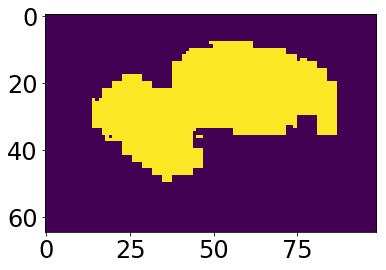

In [20]:
#This block shows an area of interest
n,m = 287,12
l,i,j = 49,51,100
plt.imshow(area[int(l*row/j)+n:int(i*row/j)+n,int(l*col/j)+m:int(i*col/j)+m])
aoi = area[int(l*row/j)+n:int(i*row/j)+n,int(l*col/j)+m:int(i*col/j)+m]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


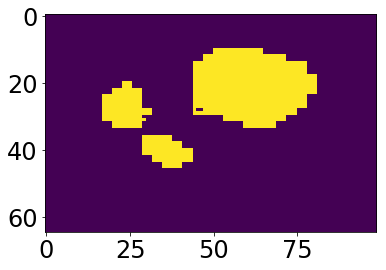

In [21]:
#This block shows the area of the wild type
get_plot_area(wt)